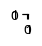

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
import torch
from torch import nn
import torch.nn.functional as F
import glob
# Here you import other functions and classes
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette
from src.data_processing import encode_batch, AA_KEYS, BL62_VALUES, BL62FREQ_VALUES, HLAS, BL50, BL50_VALUES
from src.models import NNAlignEFSinglePass
from src.datasets import NNAlignDatasetEFSinglePass

In [5]:
df = pd.read_csv('../data/mhc1_el_sub10k/sample_no_u.csv').sample(10, random_state=0)
df

,Unnamed: 0,sequence,target,HLA,pseudoseq,fold,len,flag
11841,11841,LLMAVAAPSRAR,0.0,HLA-B57:01,LLLLLMRARGSG,1,12,False
19385,19385,LLLVVVHVI,0.0,HLA-B39:06,LLQLLLHVINSL,1,9,False
16311,16311,NGFEGTDM,0.0,HLA-B35:02,SELNGFTDMKDM,1,8,False
19379,19379,NRYLDFSSK,0.0,HLA-C07:02,WISNRYSSKEVK,1,9,False
36752,36753,SVDIRTMSSRDLL,0.0,HLA-B15:01,AALSVDDLLNAL,3,13,False
31901,31902,MQAHITRA,0.0,HLA-C12:03,LCTMQATRALHN,3,8,False
32425,32426,LSFCHICFELNIE,0.0,HLA-C07:01,KETLSFNIEGVP,3,13,False
12363,12363,SKQRRSRRK,0.0,HLA-C07:02,LALSKQRRKKAN,1,9,False
38721,38722,IKVSKAAADLMT,0.0,HLA-C03:03,LCRIKVLMTYCD,3,12,False
43820,43821,SVLISLKQA,0.0,HLA-B07:02,RMRSVLKQAPLV,4,9,False


In [6]:
from torch.utils.data import SequentialSampler
dataset = NNAlignDatasetEFSinglePass(df, max_len=13, window_size=9, indel=True)
loader = dataset.get_dataloader(1024, SequentialSampler)

In [7]:
dataset.x_mask

tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.]],

        [[1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
  